## Enhancing Customer Product Review  Sentiment Analysis through Deep Learning  Models Incorporating Acoustic and Textual  Features


## Introduction:

We use deep learning models to do sentiment analysis on user-generated product reviews. We do this by utilizing two different models: BERT (Bidirectional Encoder Representations from Transformers) and the Long Short-Term Memory (LSTM) model, which is a type of recurrent neural network (RNN). With transformer-based architectures, BERT excels in semantic comprehension and contextual understanding, while the LSTM model is best at identifying sequential patterns and long-range dependencies in textual input. Through the integration of these models, our objective is to obtain a full understanding of the sentiments sent by customers in product reviews, which will enable improved comprehension and interpretation of customer feedback.

## Define Conversation and Tokenization

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the conversation
conversation = [
    "Hello?",
    "Hi, am I speaking with Mr. Smith?",
    "Yes, speaking. Who's this?",
    "Hi Mr. Smith, I'm calling from Amazon's customer service department. We noticed that you recently purchased a laptop from us. Is that correct?",
    "Yes, that's right. Is there a problem with the order?",
    "Not exactly a problem, sir. We just wanted to inform you about our exchange program. We've recently launched an upgraded version of the laptop you purchased, and we're offering a free exchange for customers who bought the previous model.",
    "Oh, that sounds interesting. What are the differences between the models?",
    "The new model comes with a faster processor, increased storage capacity, and improved battery life. It's a significant upgrade from the one you currently have.",
    "That does sound tempting. But how does the exchange process work?",
    "It's quite simple, Mr. Smith. We'll arrange for the new laptop to be shipped to you, and at the same time, our delivery partner will collect the old one from your address. You won't have to pay anything extra, and there won't be any hassle for you.",
    "That sounds convenient. But what about my data on the old laptop?",
    "We'll guide you through the process of transferring your data to the new laptop securely. And if you need any assistance with that, our customer service team will be available to help you at every step.",
    "Alright, I'm convinced. When can I expect the exchange to take place?",
    "We can schedule the exchange for a time that's convenient for you. How about later this week?",
    "That works for me. Thank you for reaching out and offering this exchange. I appreciate the excellent customer service.",
    "You're welcome, Mr. Smith. We always strive to provide the best service to our customers. Is there anything else I can assist you with today?",
    "No, that's all for now. Thank you again.",
    "Have a great day, Mr. Smith. And enjoy your new laptop!",
    "You too. Goodbye.",
    "Goodbye."
]

# Tokenize the conversation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(conversation)
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in conversation:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


## Define and Train the LSTM Model

In [3]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(xs, ys, epochs=10, verbose=1)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0216 - loss: 5.1105
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.0492 - loss: 4.9354
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0271 - loss: 4.7931
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0690 - loss: 4.6315
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0562 - loss: 4.6371
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0348 - loss: 4.5950
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0661 - loss: 4.3959
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0688 - loss: 4.3421
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0630 - loss: 4.2196
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0825 - loss: 4.1099


## Generate Text Using the Trained Model

In [4]:
# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=1)
        print(predicted)
        # output_word = ""
        # for word, index in tokenizer.word_index.items():
        #     if index == predicted:
        #         output_word = word
        #         break
        # seed_text += " " + output_word
    return seed_text

# Generate responses
seed_text = "Customer:"
next_words = 50
generated_text = generate_text(seed_text, next_words, model, max_sequence_len)
print(generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.87546703e-05 2.38580890e-02 1.85012296e-02 5.32959774e-03
  4.45091426e-02 4.61325236e-02 8.34723748e-03 5.07599255e-03
  1.61379506e-03 1.18346000e-02 1.71344541e-02 5.35572954e-02
  3.91995087e-02 1.67417079e-02 3.78144020e-03 1.91342400e-03
  8.52922164e-03 9.24873981e-04 1.16270734e-02 3.94077087e-03
  3.27014551e-03 5.55470306e-03 3.78440954e-02 4.77567315e-03
  5.50500443e-03 5.22289483e-04 1.01943978e-03 3.80873471e-03
  1.78988203e-02 1.30077708e-04 2.62017678e-02 1.33275564e-04
  3.43497805e-02 4.53237590e-04 4.53619170e-04 1.22363120e-02
  2.87023350e-03 1.48111745e-03 4.11269779e-04 1.27008297e-02
  2.91741416e-02 1.93207748e-02 6.01384032e-04 6.84393803e-04
  2.17675492e-02 2.14191861e-02 4.29704972e-03 5.98078640e-03
  3.22929281e-03 9.12895775e-04 4.33574012e-03 5.25574782e-04
  1.39823789e-03 3.46906832e-04 4.61083720e-04 5.33876300e-04
  1.31168747e-02 3.54307215e-03 1.52555639e-02 8.23482592e-03
  1.34470611e-04 1.09288683e-02 

## Load Data and Train LSTM Model

In [5]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = text.lower()
    return text

try:
    # Read the CSV file
    df = pd.read_csv('Reviews And Ratings.csv')
    
    # Check if the required columns are present
    if 'translated' not in df.columns or 'Rating' not in df.columns:
        raise ValueError("Dataset does not contain required columns 'translated' and 'Rating'.")
except FileNotFoundError:
    print("Error: 'Reviews And Ratings.csv' not found.")

# Preprocess data
df = df.dropna(subset=['translated', 'Rating'])
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)
df['translated'] = df['translated'].apply(preprocess_text)

# Tokenize text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['translated'])
sequences = tokenizer.texts_to_sequences(df['translated'])

# Pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode sentiment labels
label_encoder = LabelEncoder()
encoded_sentiments = label_encoder.fit_transform(df['sentiment'])
encoded_sentiments = pd.get_dummies(encoded_sentiments).values

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_sentiments, test_size=0.2, random_state=42)

# Build LSTM model
embedding_dim = 50
num_classes = encoded_sentiments.shape[1]
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    LSTM(100),
    Dense(num_classes, activation='softmax')
])


# Compile and train model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'LSTM Model Accuracy: {accuracy}')


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - accuracy: 0.7703 - loss: 0.5886 - val_accuracy: 0.8762 - val_loss: 0.3885
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.8284 - loss: 0.4182 - val_accuracy: 0.8762 - val_loss: 0.3214
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - accuracy: 0.8494 - loss: 0.3539 - val_accuracy: 0.8762 - val_loss: 0.3034
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.8707 - loss: 0.3002 - val_accuracy: 0.8893 - val_loss: 0.2307
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.9239 - loss: 0.2043 - val_accuracy: 0.9121 - val_loss: 0.1943
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9351 - loss: 0.1423
LSTM Model Accuracy: 0.9120520949363708


## Load Data and Evaluate BERT Models

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 72s 9s/step
Accuracy for model bert-base-uncased: 0.51


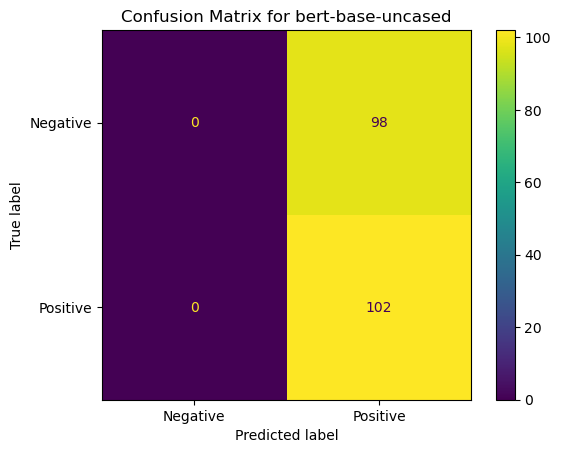

Evaluation for model bert-base-uncased
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.51      1.00      0.68       102

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/Users/aadarsh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aadarsh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aadarsh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, DataCollatorWithPadding, TFAutoModelForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

# Load the Amazon Polarity dataset from Hugging Face
raw_datasets = load_dataset("amazon_polarity")

# Split the dataset into train, validation, and test sets
raw = raw_datasets['test'].train_test_split(0.005, seed=50, shuffle=True)['test']
train_test = raw.train_test_split(0.20, seed=50, shuffle=True)
val_test = train_test['test'].train_test_split(0.5, seed=50, shuffle=True)

# Convert to pandas DataFrames
train_df = train_test['train'].to_pandas()
validation_df = val_test['train'].to_pandas()
test_df = val_test['test'].to_pandas()

# Function to tokenize texts
def tokenize_texts(texts,tokenizer):
    return tokenizer(texts.tolist(), truncation=True, padding=True, return_tensors='tf')

# Function to evaluate a model
def evaluate_model(checkpoint, train_df, validation_df, test_df):
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    # Tokenize the dataframes
    train_tokens = tokenize_texts(train_df['content'],tokenizer)
    validation_tokens = tokenize_texts(validation_df['content'],tokenizer)
    test_tokens = tokenize_texts(test_df['content'],tokenizer)

    # Create TensorFlow datasets from tokenized data
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_tokens), train_df['label']
    )).shuffle(buffer_size=1000).batch(32)

    validation_dataset = tf.data.Dataset.from_tensor_slices((
        dict(validation_tokens), validation_df['label']
    )).batch(32)

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_tokens), test_df['label']
    )).batch(32)

    # Load the model for sequence classification
    model = TFAutoModelForSequenceClassification.from_pretrained(
        checkpoint, num_labels=2
    )
    
    # Compile the model with loss and optimizer
    model.compile(
        optimizer='adam',
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train the model
    model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=1
    )

    # Evaluate the model
    predictions = model.predict(test_dataset)
    y_pred = np.argmax(predictions.logits, axis=1)

    # Ground truth labels for the test set
    y_true = test_df['label'].to_numpy()

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy for model {checkpoint}: {accuracy}")

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive']).plot()
    plt.title(f"Confusion Matrix for {checkpoint}")
    plt.grid(False)
    plt.show()

    # Display a classification report
    print(f"Evaluation for model {checkpoint}")
    print(classification_report(y_true, y_pred))

# List of BERT model checkpoints to evaluate
checkpoints = ["bert-base-uncased"]#["distilbert-base-uncased", "bert-base-uncased", "bert-base-cased", "bert-large-uncased"]

# Evaluate each model checkpoint
for checkpoint in checkpoints:
    evaluate_model(checkpoint, train_df, validation_df, test_df)

## # Naive Bayes Classifier for Text Sentiment Analysis


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing the data
# Assuming 'translated' is the column containing the text data
# Assuming 'Rating' is the column containing the ratings

# Remove rows where the "Rating" column is zero
df = df[df['Rating'] != 0]

# 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Split the data into features and target variable
X = df['translated']
y = df['sentiment']

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data to create the feature matrix
X_transformed = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Naive Bayes Model Accuracy: {accuracy}')

Naive Bayes Model Accuracy: 0.8762214983713354


## Sentiment Analysis Based on Ratings Data and Visualization


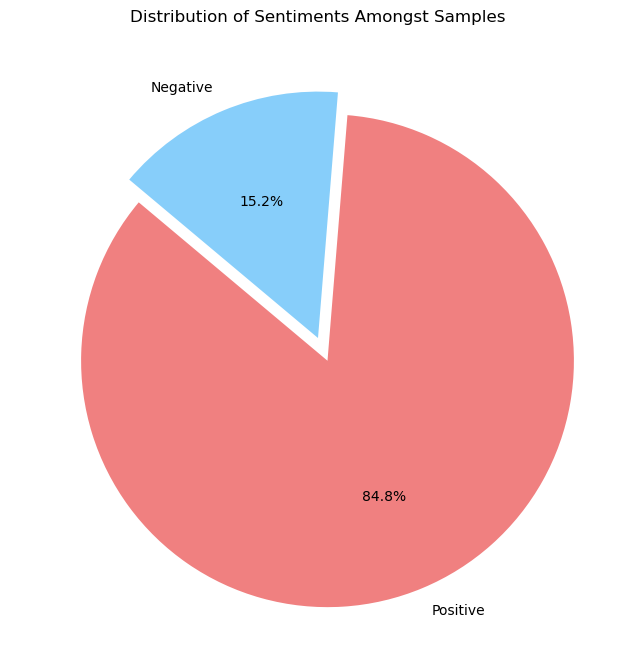

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Assuming 'Rating' is the column containing the ratings

# Remove rows where the "Rating" column is zero
df = df[df['Rating'] != 0]

# 'sentiment' based on the 'Rating'
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >= 4 else -1)

# Calculate the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot a pie chart
labels = ['Positive', 'Negative']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Positive)

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Distribution of Sentiments Amongst Samples')
plt.show()


## Comparission of LSTM , Naive Bayes And BERT Models

The accuracy of models such as BERT, LSTM, and Naive Bayes can vary depending on various factors including the dataset, model architecture, hyperparameters, and preprocessing techniques. However, I can provide some general insights:

Naive Bayes:

Naive Bayes is a simple and efficient algorithm commonly used for text classification tasks.
Its performance heavily depends on the assumption of feature independence, which may not hold true for text data.
Naive Bayes tends to work well on small to medium-sized datasets with relatively simple classification tasks.
Its accuracy could range from around 70% to 90% depending on the dataset complexity and quality of features.

LSTM:

LSTM (Long Short-Term Memory) networks are a type of recurrent neural network (RNN) that are well-suited for sequence data like text.
LSTMs can capture long-term dependencies in sequences and are capable of learning complex patterns in data.
With appropriate tuning and preprocessing, LSTM models can achieve high accuracy on text classification tasks.
The accuracy of LSTM models can vary widely, but it's not uncommon to see accuracies in the range of 80% to 95% on text classification tasks.

BERT (Bidirectional Encoder Representations from Transformers):

BERT is a state-of-the-art language representation model developed by Google.
It utilizes Transformer architecture and pretraining on large text corpora to generate contextualized word embeddings.
BERT has achieved remarkable performance on various natural language processing tasks, often surpassing previous benchmarks.
Depending on the task and dataset size, BERT models can achieve accuracies exceeding 90%.